In [1]:
!wget https://sagemaker-sample-data-us-west-2.s3-us-west-2.amazonaws.com/autopilot/direct_marketing/bank-additional.zip

--2020-12-16 08:15:43--  https://sagemaker-sample-data-us-west-2.s3-us-west-2.amazonaws.com/autopilot/direct_marketing/bank-additional.zip
Resolving sagemaker-sample-data-us-west-2.s3-us-west-2.amazonaws.com (sagemaker-sample-data-us-west-2.s3-us-west-2.amazonaws.com)... 52.218.224.217
Connecting to sagemaker-sample-data-us-west-2.s3-us-west-2.amazonaws.com (sagemaker-sample-data-us-west-2.s3-us-west-2.amazonaws.com)|52.218.224.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 432828 (423K) [application/zip]
Saving to: ‘bank-additional.zip’

bank-additional.zip 100%[===================>] 422.68K   869KB/s    in 0.5s    

2020-12-16 08:15:44 (869 KB/s) - ‘bank-additional.zip’ saved [432828/432828]



In [1]:
#!unzip bank-additional.zip

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('bank-additional/bank-additional.csv')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [19]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [22]:
df.index
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [77]:
df.assign(age_pdays=df['age']*df['pdays']).head() # => df.assign(age_pdays = lambda x: x.age*x.pdays)
#assign always returns a copy of the data, leaving the original DataFrame untouched.
# Hence below cannot work
#age_pdays = df.pop('age_pdays')
#del df['age_pdays']
# use '+' operation to add the new column to the original dataframe

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_pdays
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,29970
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,38961
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,24975
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,37962
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,46953


In [63]:
#Querying data from df
df.query('age<30')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
10,25,services,single,basic.6y,unknown,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
14,29,admin.,single,high.school,no,no,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
15,27,services,single,university.degree,no,no,no,cellular,jul,wed,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
22,29,technician,single,university.degree,no,yes,yes,cellular,aug,wed,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.967,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4050,27,student,single,high.school,no,no,yes,cellular,jul,wed,...,2,999,1,failure,-2.9,92.469,-33.6,1.029,5076.2,no
4056,27,services,married,university.degree,no,no,no,cellular,may,tue,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no
4087,29,admin.,married,university.degree,no,yes,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
4089,25,admin.,single,university.degree,no,yes,yes,cellular,oct,fri,...,1,999,1,failure,-3.4,92.431,-26.9,0.739,5017.5,yes


In [76]:
#select row by integer/index location
df.iloc[2]

age                        25
job                  services
marital               married
education         high.school
default                    no
housing                   yes
loan                       no
contact             telephone
month                     jun
day_of_week               wed
duration                  227
campaign                    1
pdays                     999
previous                    0
poutcome          nonexistent
emp.var.rate              1.4
cons.price.idx         94.465
cons.conf.idx           -41.8
euribor3m               4.962
nr.employed            5228.1
y                          no
Name: 2, dtype: object

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [158]:
dff1 = df.loc[1:100,:].query('age<30') # dff1 = df[df['age']>30]
dff2 = df.loc[1:100,:].query('age>60')
#dff1.append(dff2) ...............to concat along rows
#frames = [dff1, dff2]
#pd.concat(frames, axis=1).head(100)..........choose axis=1 to concat along columns

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no


In [224]:
#counting NaN in all columns of df
df.loc[1:100,:].isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [432]:
#dropping rows with NaNs more than 50% of their values
rows_to_be_deleted = []
for i in range(len(df)):
    if df.iloc[i].isnull().sum()/df.iloc[i].count()*100>50:
        print(i, 'is null')
        rows_to_be_deleted.append(i)

print(rows_to_be_deleted)
df.drop(rows_to_be_deleted, axis=0)

[]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [443]:
#rows_to_be_deleted.append(df.iloc[0,:])
#print(rows_to_be_deleted)
print(df.drop(index=0))
df.head()

      age         job  marital          education default  housing     loan  \
1      39    services   single        high.school      no       no       no   
2      25    services  married        high.school      no      yes       no   
3      38    services  married           basic.9y      no  unknown  unknown   
4      47      admin.  married  university.degree      no      yes       no   
5      32    services   single  university.degree      no       no       no   
...   ...         ...      ...                ...     ...      ...      ...   
4114   30      admin.  married           basic.6y      no      yes      yes   
4115   39      admin.  married        high.school      no      yes       no   
4116   27     student   single        high.school      no       no       no   
4117   58      admin.  married        high.school      no       no       no   
4118   34  management   single        high.school      no      yes       no   

        contact month day_of_week  ...  campaign  p

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [192]:
#drop columns with more than 50% missing values
for col in df.columns:
    if df[col].isnull().sum()/df[col].count() * 50 > 1:
        df.drop([col], axis=1) #axis=1 to drop a column
        print(col, 'has null values and thus dropping i')
    else:
        print(col, 'does not have null values')

age does not have null values 4119
job does not have null values 4119
marital does not have null values 4119
education does not have null values 4119
default does not have null values 4119
housing does not have null values 4119
loan does not have null values 4119
contact does not have null values 4119
month does not have null values 4119
day_of_week does not have null values 4119
duration does not have null values 4119
campaign does not have null values 4119
pdays does not have null values 4119
previous does not have null values 4119
poutcome does not have null values 4119
emp.var.rate does not have null values 4119
cons.price.idx does not have null values 4119
cons.conf.idx does not have null values 4119
euribor3m does not have null values 4119
nr.employed does not have null values 4119
y does not have null values 4119


In [208]:
# Dropping the columns having NaN/NaT values 
df = df.dropna(axis=1) #dropna(how=’any’/'all',axis=0/1)

In [205]:
# Dropping rows having NaN/NaT values
df.dropna()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [446]:
#Drop rows which are identical duplicates 
#https://hackersandslackers.com/pandas-dataframe-drop/
df = df.drop_duplicates() #by default inplace=True

In [262]:
#fill NaNs with 0s
df.fillna(0,inplace=True)
#fill NaNs with column means
df.fillna(df.mean(),inplace=True) #df.mean() works for integer/float columns

In [263]:
#faster code to fill NaNs with column means
for i in df.columns[df.isnull().any(axis=0)]:
    df[i].fillna(df[i].mean, inplace=True)

In [284]:
## Dealing with Categoricals 
##
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [285]:
for i in df.columns:
    if df[i].dtype == object:
        df[i].astype('category')
        print(i,df[i].dtypes)

job object
marital object
education object
default object
housing object
loan object
contact object
month object
day_of_week object
poutcome object
y object


In [303]:
#new dataframe with category data types from object datatypes
dff4 = df.iloc[1:100,1:4]
dff4.dtypes
dff5 = dff4.astype('category')
dff5.dtypes

job          category
marital      category
education    category
dtype: object

In [306]:
dff5.describe()

,job,marital,education
count,99,99,99
unique,11,3,7
top,admin.,married,university.degree
freq,24,55,37


In [307]:
dff5.nunique()

job          11
marital       3
education     7
dtype: int64

In [318]:
dff5['marital'].cat.rename_categories({'single':'1','married':'2','divorced':'3'})

1     1
2     2
3     2
4     2
5     1
     ..
95    2
96    2
97    2
98    2
99    2
Name: marital, Length: 99, dtype: category
Categories (3, object): [3, 2, 1]

In [319]:
dff5['marital']

1      single
2     married
3     married
4     married
5      single
       ...   
95    married
96    married
97    married
98    married
99    married
Name: marital, Length: 99, dtype: category
Categories (3, object): [divorced, married, single]

In [332]:
#convert df's categorical variables into dummmies/ one hot encodings
age_job_df = df[['age','job', 'marital', 'education', 'duration']]
age_job_dummies = pd.get_dummies(age_job_df)
age_job_dummies.head()

,age,duration,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,30,487,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,39,346,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
2,25,227,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,38,17,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,47,58,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [335]:
df_with_dummies = pd.get_dummies(df)
df_with_dummies.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,1,0,0,0,0,0,1,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,1,0,0,0,0,0,1,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,1,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,1,0,0,0,0,0,1,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,1,0,0,0,0,1,0,1,0


In [ ]:
#convert categorical variales into one hot encodings/ dummies
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder()
df_one_hot_encoded = oe.fit_transform(df[['job', 'marital']])
df_one_hot_encoded

In [389]:
#convert one categorical variables into numerical classes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#df_labelEncoder = le.fit_transform(df['job'].astype('str'))
df_labelEncoder = le.fit_transform(df['job'])
df_labelEncoder

array([1, 7, 7, ..., 8, 0, 4])

In [382]:
#convert all categorical variables in a dataframe into numerical cla
encoded_df = pd.DataFrame()
for col in df.columns:
    if df[col].dtypes == object:
        encoded_col = le.fit_transform(df[col])
        encoded_df[col] = encoded_col

In [383]:
encoded_df.head()
encoded_df.dtypes

job            int64
marital        int64
education      int64
default        int64
housing        int64
loan           int64
contact        int64
month          int64
day_of_week    int64
poutcome       int64
y              int64
dtype: object

In [413]:
## Remove outliers #############
################################


In [458]:
## Remove outlier rows from the data which fall beyond 1-99 quantiles for every column
df_filtered_quantiles = pd.DataFrame()
for col in df.columns:
    if df[col].dtype != object:
        df_high_quantile = df[col].quantile(0.99)
        df_low_quantile = df[col].quantile(0.09)
        df_filtered_quantiles = df[(df[col]<df_high_quantile) & (df[col]>df_low_quantile)]
        
df_filtered_quantiles.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no


In [528]:
##Remove outliers using zscores
num_cols=[]
for col in df.columns:
    if df[col].dtype != object:
        num_cols.append(col)
print(num_cols)
z_scores = stats.zscore(df[num_cols])
abs_z_scores = np.abs(z_scores)
new_df = df[(abs_z_scores<3).all(axis=1)]

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [529]:
new_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,3717.000000,3717.000000,3717.000000,3717.0,3717.000000,3717.000000,3717.000000,3717.000000,3717.000000,3717.000000
mean,39.771859,232.722626,2.296476,999.0,0.100619,0.191633,93.582773,-40.610923,3.757206,5174.053753
std,9.634613,187.246054,1.731995,0.0,0.300864,1.510034,0.562155,4.428348,1.660227,66.208362
min,18.000000,0.000000,1.000000,999.0,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,102.000000,1.000000,999.0,0.000000,-1.800000,93.075000,-42.700000,1.405000,5099.100000
50%,38.000000,175.000000,2.000000,999.0,0.000000,1.100000,93.444000,-41.800000,4.857000,5195.800000
75%,47.000000,302.000000,3.000000,999.0,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,71.000000,1014.000000,10.000000,999.0,1.000000,1.400000,94.767000,-26.900000,4.970000,5228.100000


In [576]:
# encode job column
df.iloc[:,1] = le.fit_transform(df.iloc[:,1]).astype('float64')
df.iloc[:,1]

0       1.0
1       7.0
2       7.0
3       7.0
4       0.0
       ... 
4114    0.0
4115    0.0
4116    8.0
4117    0.0
4118    4.0
Name: job, Length: 4119, dtype: float64

In [ ]:
########### Remove  correlated columns ############
###################################################

In [627]:
corrMatrix = df.corr()

In [628]:
corrMatrix

,age,job,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.014618,0.041299,-0.014169,-0.043425,0.050931,-0.019192,-0.000482,0.098135,-0.015033,-0.041936
job,0.014618,1.000000,-0.016325,0.002553,-0.007936,0.024140,-0.021355,-0.004887,0.039656,-0.019559,-0.033605
duration,0.041299,-0.016325,1.000000,-0.085348,-0.046998,0.025724,-0.028848,0.016672,-0.034745,-0.032329,-0.044218
campaign,-0.014169,0.002553,-0.085348,1.000000,0.058742,-0.091490,0.176079,0.145021,0.007882,0.159435,0.161037
pdays,-0.043425,-0.007936,-0.046998,0.058742,1.000000,-0.587941,0.270684,0.058472,-0.092090,0.301478,0.381983
previous,0.050931,0.024140,0.025724,-0.091490,-0.587941,1.000000,-0.415238,-0.164922,-0.051420,-0.458851,-0.514853
emp.var.rate,-0.019192,-0.021355,-0.028848,0.176079,0.270684,-0.415238,1.000000,0.755155,0.195022,0.970308,0.897173
cons.price.idx,-0.000482,-0.004887,0.016672,0.145021,0.058472,-0.164922,0.755155,1.000000,0.045835,0.657159,0.472560
cons.conf.idx,0.098135,0.039656,-0.034745,0.007882,-0.092090,-0.051420,0.195022,0.045835,1.000000,0.276595,0.107054
euribor3m,-0.015033,-0.019559,-0.032329,0.159435,0.301478,-0.458851,0.970308,0.657159,0.276595,1.000000,0.942589


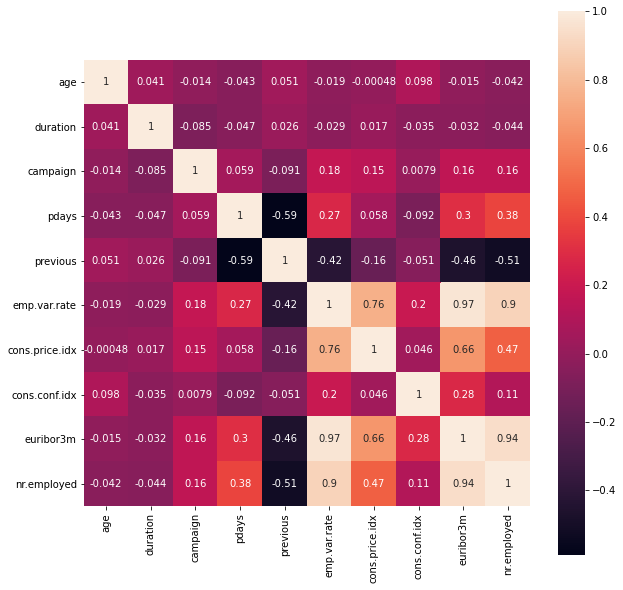

In [570]:
import seaborn as sns
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True
ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corrMatrix, annot=True, square=True) #mask=mask for half heatmap

In [567]:
#Correlation between 'previous' and all other values. Very useful for calculating 
# correlations of dependent variable with indendent variable
#compare the correlation between features and remove one of two features that 
# have a correlation higher than 0.9
previous_corr = df.corr()[['previous']].sort_values(by='previous', ascending=False)

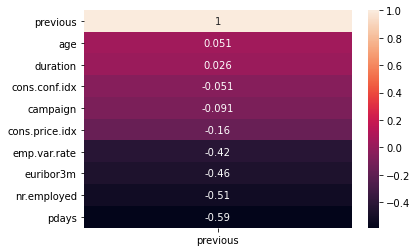

In [564]:
ax = sns.heatmap(previous_corr, annot=True)

In [624]:
#get list of corrtelated features
correlated_features = []
for row in range(len(corrMatrix)):
    for col in range(row+1, len(corrMatrix)):
        if corrMatrix.iloc[row,col] >=0.9: # and row != col:
            print(corrMatrix.iloc[row,col])
            correlated_features.append([row, col])
            
correlated_features

0.9703079598849491
0.9425892832458327


[[5, 8], [8, 9]]

In [660]:
#remove correlated features
columns = np.full((corrMatrix.shape[0],), True, dtype=bool)
for i in range(corrMatrix.shape[0]):
    for j in range(i+1, corrMatrix.shape[0]):
        if corrMatrix.iloc[i,j]>0.9:
            if columns[j]: #equivalent to if columns[i, j]==True
                columns[j] = False
selected_columns = corrMatrix.columns[columns] #select list of columns with value True in columns list
df_without_correlated = df[selected_columns] 
df_without_correlated.describe()

,age,job,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,3.824958,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102
std,10.313362,3.606319,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578
min,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000
25%,32.000000,1.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000
50%,38.000000,3.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000
75%,47.000000,7.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000
max,88.000000,11.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000


In [573]:
#Feature selection based on p-values
# https://www.kaggle.com/bbloggsbott/feature-selection-correlation-and-p-value
# https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf

In [728]:
#not based on the notebookdata
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i): #size of X reduces as cols are removed and that's why '-i'
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [722]:
SL = 0.05 
x_df_nemericals = df.loc[:,['duration', 'campaign','pdays', 'previous', 
                            'emp.var.rate', 'cons.price.idx', 
                            'cons.conf.idx', 'euribor3m', 'nr.employed']]
y_df_numericals = df.loc[:,['age']]
selected_columns = x_df_nemericals.columns
x_df_nemericals.head()
selected_columns.shape

#df.select_dtypes('number').columns ............to get indicex of numerical columns

(9,)

In [723]:
data_modeled, selected_columns = backwardElimination(x_df_nemericals.values,
                                                    y_df_numericals.values,
                                                    SL,
                                                    selected_columns)

In [724]:
data_modeled

array([[ 4.8700e+02,  0.0000e+00, -1.8000e+00,  9.2893e+01, -4.6200e+01],
       [ 3.4600e+02,  0.0000e+00,  1.1000e+00,  9.3994e+01, -3.6400e+01],
       [ 2.2700e+02,  0.0000e+00,  1.4000e+00,  9.4465e+01, -4.1800e+01],
       ...,
       [ 6.4000e+01,  1.0000e+00, -1.8000e+00,  9.2893e+01, -4.6200e+01],
       [ 5.2800e+02,  0.0000e+00,  1.4000e+00,  9.3444e+01, -3.6100e+01],
       [ 1.7500e+02,  0.0000e+00, -1.0000e-01,  9.3200e+01, -4.2000e+01]])

In [725]:
selected_columns

Index(['duration', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx'],
      dtype='object')

In [726]:
df_after_discarding_cols = pd.DataFrame(data = data_modeled, columns = selected_columns)

In [727]:
df_after_discarding_cols.head()

,duration,previous,emp.var.rate,cons.price.idx,cons.conf.idx
0,487.0,0.0,-1.8,92.893,-46.2
1,346.0,0.0,1.1,93.994,-36.4
2,227.0,0.0,1.4,94.465,-41.8
3,17.0,0.0,1.4,94.465,-41.8
4,58.0,0.0,-0.1,93.200,-42.0
